### Feature Description
<table>
<tr><th>Feature Name</th><th>Definition</th></tr>
<tr><td>Pregnencies</td><td> Number of times pregnent </td></tr>
<tr><td>Glucose</td> <td>Plasma glucose concentration a 2 hours in an oral 
glucose tolerance test</td></tr>
<tr><td>Blood Pressure </td><td>Diastolic blood pressure (mm Hg)</td></tr>
<tr><td>Skin Thickness </td><td>Triceps skin fold thickness (mm) </td></tr>
<tr><td>Insulin </td><td>2-Hour serum insulin (mu U/ml)</td></tr>
<tr><td>BMI </td><td>Body Mass Index</td></tr>
<tr><td>DiabetesPedigreeFunction </td><td>Values Computed based on Diabetes pedigree function</td></tr>
<tr><td>Age </td><td>Age (years)</td></tr>
<tr><td>Outcome</td><td>0 or 1</td></tr>
</table>

<ol>
<li>Read the dataset 'diabetes.csv'</li>
<li>Remove the null values if any</li>
<li>Represent Outcome count on a Countplot and Outcome percentage on a pie chart</li>
<li>Represent Glucose vs Blood Pressure on a scatterchart based on Outcome</li>
<li>Represent Blood Pressure vs Insulin on a scatterchart based on Outcome</li>
<li>Represent SkinThickness vs BMI on a scatterchart based on Outcome</li>
<li>Replace all the 0 values present in Glucose, BloodPressure, SkinThickness, Insulin and  BMI columns with their mean respectively</li>
<li>Considering all the columns as independent features and the 'Outcome' column as dependent feature, split the dataset into training and testing dataset with test size 25%</li>
<li>Apply Decision Tree classifier and predict the 'Outcome' column for testing dataset</li>
<li>Find accuracy score for training and testing dataset</li>
<li>Generate confusion matrix</li>
<li>Generate Classification Report</li>
<li>Apply Random Forest classifier and predict the 'Outcome' column for testing dataset</li>
<li>Repeat Q10-Q12 for RandomForest as well</li>    
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Data visualization**
####Represent Outcome count on a Countplot and Outcome percentage on a pie chart
####Represent Glucose vs Blood Pressure on a scatterchart based on Outcome
####Represent Blood Pressure vs Insulin on a scatterchart based on Outcome
####Represent SkinThickness vs BMI on a scatterchart based on Outcome

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
w = df['Outcome'].value_counts()
print(w.index)
print(w.values)
w = pd.DataFrame(w)
print(w)

Int64Index([0, 1], dtype='int64')
[500 268]
   Outcome
0      500
1      268


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


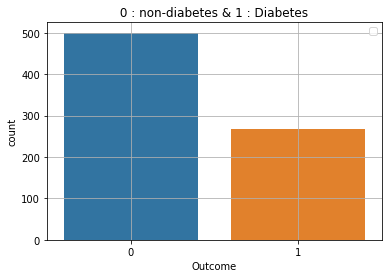

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


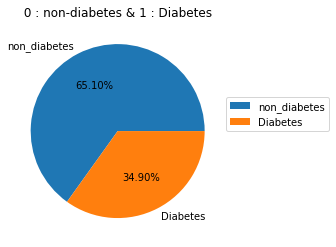

In [7]:
sns.countplot(df['Outcome'])
plt.grid()
plt.legend()
plt.title(' 0 : non-diabetes & 1 : Diabetes ')
plt.show()
print(' ')
plt.pie(w,labels=['non_diabetes','Diabetes'],autopct='%.2f%%')
plt.legend(loc=(1,0.5))
plt.title(' 0 : non-diabetes & 1 : Diabetes ')
plt.show()

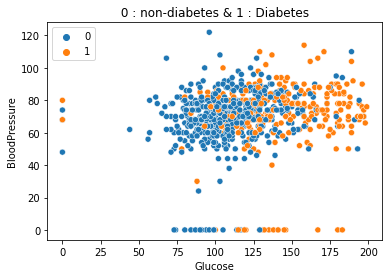

In [8]:
# sns.scatterplot(x=df['Glucose'],y=df['BloodPressure'],hue=['Outcome'])
sns.scatterplot(x=df['Glucose'],y=df['BloodPressure'],hue=df['Outcome'])
plt.legend()
plt.title(' 0 : non-diabetes & 1 : Diabetes ')
plt.show()

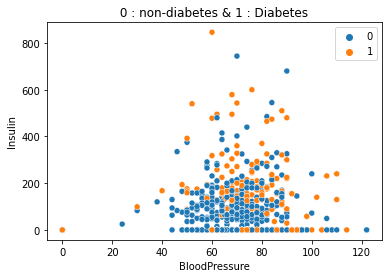

In [9]:
sns.scatterplot(x=df['BloodPressure'],y=df['Insulin'],hue=df['Outcome'])
plt.legend() 
plt.title(' 0 : non-diabetes & 1 : Diabetes ')
plt.show()

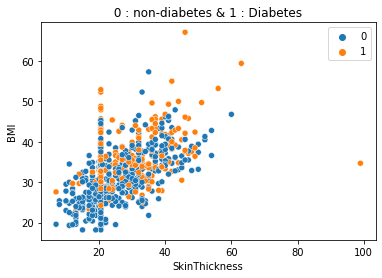

In [149]:
sns.scatterplot(x=df['SkinThickness'],y=df['BMI'],hue=df['Outcome'])
plt.legend() 
plt.title(' 0 : non-diabetes & 1 : Diabetes ')
plt.show()

####**Replace all the 0 values present in Glucose, BloodPressure, SkinThickness, Insulin and BMI columns with their mean respectively**

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [148]:
df['Insulin'] = df['Insulin'].replace({0:df['Insulin'].mean()})
df['Glucose'] = df['Glucose'].replace({0:df['Glucose'].mean()})
df['BloodPressure'] = df['BloodPressure'].replace({0:df['BloodPressure'].mean()})
df['SkinThickness'] = df['SkinThickness'].replace({0:df['SkinThickness'].mean()})
df['BMI'] = df['BMI'].replace({0:df['BMI'].mean()})

In [18]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


###**Considering all the columns as independent features and the 'Outcome' column as dependent feature, split the dataset into training and testing dataset with test size 25%**

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [118]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [21]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [120]:
x_train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
414,0,138.0,60.0,35.000000,167.000000,34.6,0.534,21
85,2,110.0,74.0,29.000000,125.000000,32.4,0.698,27
760,2,88.0,58.0,26.000000,16.000000,28.4,0.766,22
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
489,8,194.0,80.0,20.536458,79.799479,26.1,0.551,67
352,3,61.0,82.0,28.000000,79.799479,34.4,0.243,46
198,4,109.0,64.0,44.000000,99.000000,34.8,0.905,26
636,5,104.0,74.0,20.536458,79.799479,28.8,0.153,48
315,2,112.0,68.0,22.000000,94.000000,34.1,0.315,26
747,1,81.0,74.0,41.000000,57.000000,46.3,1.096,32


In [37]:
y_test.head(10)

749    1
275    0
524    0
154    1
632    0
462    0
291    1
92     0
66     1
173    0
Name: Outcome, dtype: int64

####Apply Decision Tree classifier and predict the 'Outcome' column for testing dataset

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=3)

In [131]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [132]:
y_pred = dtc.predict(x_test)

In [133]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

###Find accuracy score for training and testing dataset


In [134]:
print('the accuracy of training data',dtc.score(x_train,y_train))
print('the accuracy of testing data',dtc.score(x_test,y_test))

the accuracy of training data 0.8732638888888888
the accuracy of testing data 0.7083333333333334


In [135]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

###accuracy score

In [136]:
accuracy_score(y_test,y_pred)

0.7083333333333334

###Generate confusion matrix

In [137]:
confusion_matrix(y_test,y_pred)

array([[89, 38],
       [18, 47]])

###Generate Classification Report

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       127
           1       0.55      0.72      0.63        65

    accuracy                           0.71       192
   macro avg       0.69      0.71      0.69       192
weighted avg       0.74      0.71      0.72       192



In [99]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [139]:
skf = StratifiedKFold(4,shuffle=True)

In [140]:
skf.split(x,y)

<generator object _BaseKFold.split at 0x7f4af146a4d0>

In [141]:
score = cross_val_score(dtc,x,y,cv=skf)

In [142]:
score.mean()

0.7382812499999999

##Testing with user inputs

In [147]:
a = int(input('Number of times got preganent : '))
b = float(input('Glucose level : '))
c = float(input('Blood pressure : '))
d = float(input('Skinthickness : '))
e = float(input('Insulin : '))
f = float(input('BMI : '))
g = float(input('DiabetesPedigreeFunction : '))
h = int(input('Age : '))
Dia = [[a,b,c,d,e,f,g,h]]

diabetes = dtc.predict(Dia)
print(diabetes)
if diabetes == 1:
  print('Avoid sweets & walk 30 mins daily you have Diabetes')
else:
  print('Dont worry you dont have diabetes,Eat lot of sweet')

Number of times got preganent : 9
Glucose level : 119
Blood pressure : 80
Skinthickness : 35
Insulin : 79
BMI : 29
DiabetesPedigreeFunction : 0.263
Age : 29
[1]
Avoid sweets & walk 30 mins daily you have Diabetes


##check out of sample

In [110]:
df.iloc[23,:]

Pregnancies                   9.000000
Glucose                     119.000000
BloodPressure                80.000000
SkinThickness                35.000000
Insulin                      79.799479
BMI                          29.000000
DiabetesPedigreeFunction      0.263000
Age                          29.000000
Outcome                       1.000000
Name: 23, dtype: float64

In [ ]:
diabetes = dtc.predict(Dia)
if diabetes == 0:
  print('Avoid sweets & walk 30 mins daily you have Diabetes')
else:
  print('Dont worry you dont have diabetes,Eat lot of sweet')

In [ ]:
######################################## END ##########################0 	